In [40]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape[1:]

(32, 32, 3)

In [4]:
# Preprocess the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

**Using hyperparameter tuning**

In [5]:
# Define the model function
def create_model(learning_rate=0.001, num_filters=32, kernel_size=(3,3), activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Conv2D(num_filters, kernel_size, activation=activation, input_shape=x_train.shape[1:]))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(num_filters*2, kernel_size, activation=activation))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(num_filters*4, kernel_size, activation=activation))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation=activation))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [7]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [8]:
# Create the KerasClassifier object
model = KerasClassifier(build_fn=create_model, verbose=0)

<ipython-input-8-6b65e3158d86>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [9]:
# Define the hyperparameters to tune
param_grid = {'learning_rate': [0.001, 0.01],
              'num_filters': [32, 64],
              'kernel_size': [(3, 3), (5, 5)],
              'activation': ['relu', 'tanh'],
              'optimizer': ['adam', 'rmsprop']}

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
# Perform grid search cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/keras/wrappers/scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipytho

In [12]:
# Print the best results
print(f'Best accuracy: {grid_result.best_score_:.4f} using {grid_result.best_params_}')

Best accuracy: 0.5778 using {'activation': 'tanh', 'kernel_size': (3, 3), 'learning_rate': 0.01, 'num_filters': 64, 'optimizer': 'adam'}


In [13]:
# Evaluate the model on the test set
test_loss, test_acc = grid_result.best_estimator_.model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 [==============================] - 12s 39ms/step - loss: 1.1467 - accuracy: 0.5933
Test accuracy: 0.5933


**Without hyper parameter tuning**

In [14]:
# Create the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 87s 110ms/step - loss: 1.5903 - accuracy: 0.4179 - val_loss: 1.3314 - val_accuracy: 0.5212
Epoch 2/10
782/782 [==============================] - 85s 108ms/step - loss: 1.2101 - accuracy: 0.5713 - val_loss: 1.1062 - val_accuracy: 0.6121
Epoch 3/10
782/782 [==============================] - 85s 109ms/step - loss: 1.0579 - accuracy: 0.6305 - val_loss: 1.0076 - val_accuracy: 0.6445
Epoch 4/10
782/782 [==============================] - 86s 110ms/step - loss: 0.9494 - accuracy: 0.6689 - val_loss: 0.9635 - val_accuracy: 0.6682
Epoch 5/10
782/782 [==============================] - 83s 106ms/step - loss: 0.8720 - accuracy: 0.6964 - val_loss: 0.9568 - val_accuracy: 0.6692
Epoch 6/10
782/782 [==============================] - 83s 107ms/step - loss: 0.8062 - accuracy: 0.7196 - val_loss: 0.9028 - val_accuracy: 0.6877
Epoch 7/10
782/782 [==============================] - 84s 107ms/step - loss: 0.7473 - accuracy: 0.7409 - val_loss: 0.8760 - val_ac

In [17]:
# Save the model to a file
model.save('cifar10_model.h5')

In [20]:
# Load the saved model
model = tf.keras.models.load_model('cifar10_model.h5')

In [21]:
# Load the CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [22]:
# Select a random test image
index = np.random.randint(len(x_test))
test_image = x_test[index]
expected_class = np.argmax(y_test[index])

In [23]:
# Make a prediction
predicted_class = np.argmax(model.predict(np.array([test_image])))

1/1 [==============================] - 0s 162ms/step


In [24]:
# Print the result
print('Expected class:', class_names[expected_class])
print('Predicted class:', class_names[predicted_class])

Expected class: frog
Predicted class: frog


In [25]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 6s 19ms/step - loss: 0.8670 - accuracy: 0.7148
Test accuracy: 0.7148000001907349


1/1 [==============================] - 0s 27ms/step


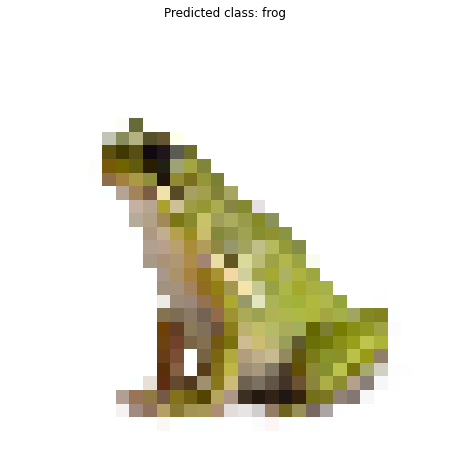

In [44]:
# Load and preprocess the image
img = image.load_img('frog.jpeg', target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

# Predict the class of the image
prediction = model.predict(img_array)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_class = class_names[np.argmax(prediction)]

# Show the predicted image and class
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_array[0])
ax.set_title('Predicted class: ' + predicted_class)
ax.axis('off')
plt.show()

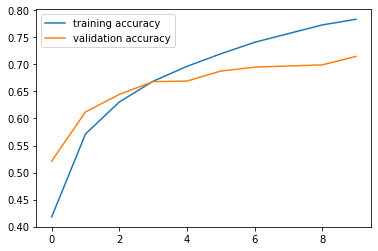

In [45]:
# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()